In [1]:
!gdown 1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ddosad/auto-sales-data

Downloading...
From: https://drive.google.com/uc?id=1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 285kB/s]
Dataset URL: https://www.kaggle.com/datasets/ddosad/auto-sales-data
License(s): other
100% 79.2k/79.2k [00:00<00:00, 505kB/s]
100% 79.2k/79.2k [00:00<00:00, 504kB/s]


In [2]:
!unzip /content/auto-sales-data.zip

Archive:  /content/auto-sales-data.zip
  inflating: Auto Sales data.csv     


#Step 1: Business Understanding (CRISP-DM Phase 1)
#Objective:
The key objective is to understand the goals of the business, formulate data mining objectives, and define success criteria. For this dataset, we'll assume that you, as an automotive company, are interested in increasing sales and improving customer retention.

#Key Questions:
What are the main factors influencing sales?
How do customer purchasing patterns (e.g., days since the last order) affect sales?
What categories of products are performing best?
Can we predict future sales for a given time period?
#Hypotheses:
Larger deal sizes (represented by the "DEALSIZE" column) contribute to higher overall sales.
Customers who make repeat orders quickly (lower "DAYS_SINCE_LASTORDER") are more likely to contribute more to overall sales.
Certain product lines (from the "PRODUCTLINE" column) may perform better than others.
#Success Criteria:
A predictive model that can forecast future sales based on customer and product data.
Insights into the most valuable customers and which products drive the most revenue.
Identifying key features contributing to sales volume (e.g., deal size, product line, etc.).


Loading the Dataset and Initial EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './Auto Sales data.csv'
auto_sales_data = pd.read_csv(file_path)

# Display the first few rows
auto_sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


#Step 2: Data Understanding (CRISP-DM Phase 2)
Now that we have loaded the dataset, we can observe the following:

##Key Columns:
ORDERNUMBER: Unique identifier for each order.

QUANTITYORDERED: Number of items in each order.

PRICEEACH: Price per item.

SALES: Total sales value (calculated as QUANTITYORDERED * PRICEEACH).

ORDERDATE: Date the order was placed.

DAYS_SINCE_LASTORDER: Number of days since the last order for the customer.

STATUS: Status of the order (e.g., "Shipped", "Cancelled").

PRODUCTLINE: Category of the product.

MSRP: Manufacturer’s suggested retail price.

CUSTOMERNAME: Customer placing the order.

PHONE, ADDRESS, CITY, POSTALCODE, COUNTRY: Customer contact details.

DEALSIZE: The size of the order (Small, Medium, Large).

#Initial Observations:
The data appears fairly structured, with clearly defined columns.
It includes both quantitative data (e.g., QUANTITYORDERED, PRICEEACH) and categorical data (e.g., STATUS, PRODUCTLINE).
There are various customer details and product attributes, which may be useful for identifying patterns.


##Missing Values:
There are no missing values in the dataset, which is great because it means we can directly proceed with analysis without the need for data imputation or handling of null values.
Statistical Summary:
QUANTITYORDERED: The number of items ordered ranges from 6 to 97, with a mean of 35.1.
PRICEEACH: The price of items varies significantly, from $26.88 to $252.87, with an average price of around $101.10.
SALES: Total sales for individual orders range from $482.13 to $14,082.80, with an average of $3,553.
DAYS_SINCE_LASTORDER: There is a wide range of time since the last order, from 42 days to 3,562 days.
MSRP: Manufacturer’s suggested retail prices range from $33 to $214, with an average MSRP of $100.69.

In [6]:

# Check for missing values and get a statistical summary
missing_values = auto_sales_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [7]:
summary_statistics = auto_sales_data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
std       91.877521         9.762135    42.042549         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000           2747.000000  2747.000000  
mean    3553.047583           1757.085912   100.691664  
std     1838.953901            819.280576    40.114802  
min      482.130000             42.000000    33.000000  
25%     2204.350000           1077.000000    68.000000  
50%   

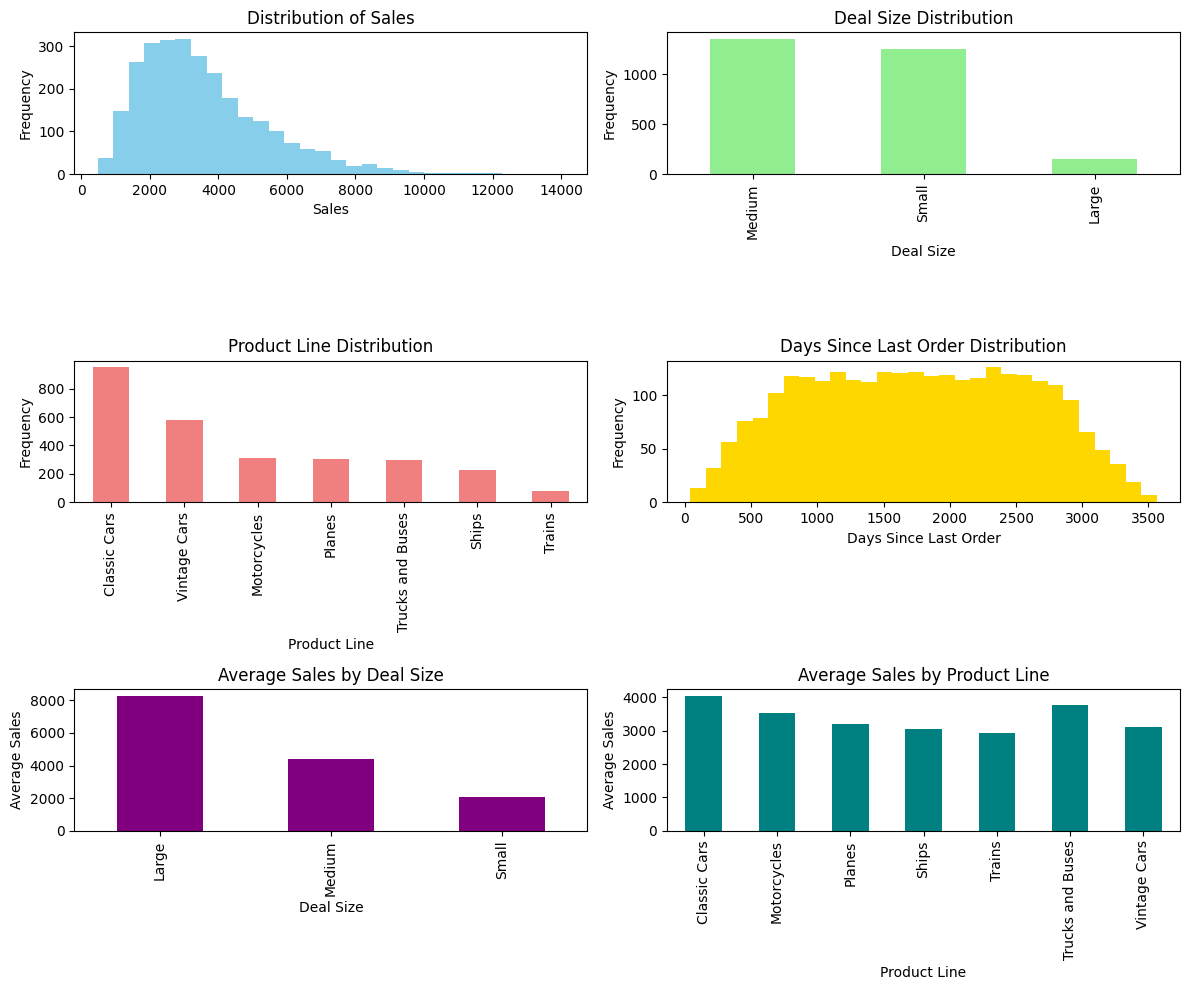

In [8]:

# Plotting distribution of key variables
fig, ax = plt.subplots(3, 2, figsize=(12, 10))

# Distribution of Sales
ax[0, 0].hist(auto_sales_data['SALES'], bins=30, color='skyblue')
ax[0, 0].set_title('Distribution of Sales')
ax[0, 0].set_xlabel('Sales')
ax[0, 0].set_ylabel('Frequency')

# Distribution of Deal Size
auto_sales_data['DEALSIZE'].value_counts().plot(kind='bar', color='lightgreen', ax=ax[0, 1])
ax[0, 1].set_title('Deal Size Distribution')
ax[0, 1].set_xlabel('Deal Size')
ax[0, 1].set_ylabel('Frequency')

# Distribution of Product Line
auto_sales_data['PRODUCTLINE'].value_counts().plot(kind='bar', color='lightcoral', ax=ax[1, 0])
ax[1, 0].set_title('Product Line Distribution')
ax[1, 0].set_xlabel('Product Line')
ax[1, 0].set_ylabel('Frequency')

# Distribution of Days Since Last Order
ax[1, 1].hist(auto_sales_data['DAYS_SINCE_LASTORDER'], bins=30, color='gold')
ax[1, 1].set_title('Days Since Last Order Distribution')
ax[1, 1].set_xlabel('Days Since Last Order')
ax[1, 1].set_ylabel('Frequency')

# Relationship between Deal Size and Sales
auto_sales_data.groupby('DEALSIZE')['SALES'].mean().plot(kind='bar', color='purple', ax=ax[2, 0])
ax[2, 0].set_title('Average Sales by Deal Size')
ax[2, 0].set_xlabel('Deal Size')
ax[2, 0].set_ylabel('Average Sales')

# Relationship between Product Line and Sales
auto_sales_data.groupby('PRODUCTLINE')['SALES'].mean().plot(kind='bar', color='teal', ax=ax[2, 1])
ax[2, 1].set_title('Average Sales by Product Line')
ax[2, 1].set_xlabel('Product Line')
ax[2, 1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

#Step3 . Data Preparation


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert ORDERDATE to datetime
auto_sales_data['ORDERDATE'] = pd.to_datetime(auto_sales_data['ORDERDATE'], format='%d/%m/%Y')

# Encode categorical variables (e.g., DEALSIZE, PRODUCTLINE)
le_dealsize = LabelEncoder()
auto_sales_data['DEALSIZE_ENCODED'] = le_dealsize.fit_transform(auto_sales_data['DEALSIZE'])

le_productline = LabelEncoder()
auto_sales_data['PRODUCTLINE_ENCODED'] = le_productline.fit_transform(auto_sales_data['PRODUCTLINE'])

# Feature engineering: Creating a new feature "Total Days since the first order"
auto_sales_data['TOTAL_DAYS'] = (auto_sales_data['ORDERDATE'] - auto_sales_data['ORDERDATE'].min()).dt.days

# Split data into train and test sets (for modeling in the next phase)
X = auto_sales_data[['QUANTITYORDERED', 'PRICEEACH', 'DAYS_SINCE_LASTORDER', 'DEALSIZE_ENCODED', 'PRODUCTLINE_ENCODED', 'MSRP', 'TOTAL_DAYS']]
y = auto_sales_data['SALES']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the prepared data
print(X_train.head())
print(y_train.head())


      QUANTITYORDERED  PRICEEACH  DAYS_SINCE_LASTORDER  DEALSIZE_ENCODED  \
1559               23     145.01                  1585                 1   
790                38     138.58                   989                 1   
1770               40      94.71                  2200                 1   
480                49      43.13                  1166                 2   
2033               33      84.77                  2679                 2   

      PRODUCTLINE_ENCODED  MSRP  TOTAL_DAYS  
1559                    3   122         851  
790                     1    60         678  
1770                    6    88         447  
480                     6    53         191  
2033                    2    72         231  
1559    3335.23
790     5266.04
1770    3788.40
480     2113.37
2033    2797.41
Name: SALES, dtype: float64


##Step 4: Modeling (CRISP-DM Phase 4)
In this phase, we will build predictive models to forecast sales based on the prepared data. We will:

Apply basic regression models (such as Linear Regression and Random Forest).
Evaluate their performance using metrics like Mean Absolute Error (MAE) and R-squared (R²).
Fine-tune the models to improve prediction accuracy.

1. Linear Regression Model


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression R²: {r2_lr}")


Linear Regression MAE: 288.5855513229531
Linear Regression R²: 0.9464243828692486


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest MAE: 63.44234581818193
Random Forest R²: 0.9945228356518939


##Step 4: Evaulation

In [12]:
# Compare performance of both models
print(f"Linear Regression: MAE = {mae_lr}, R² = {r2_lr}")
print(f"Random Forest: MAE = {mae_rf}, R² = {r2_rf}")

if mae_rf < mae_lr:
    print("Random Forest performs better based on MAE.")
else:
    print("Linear Regression performs better based on MAE.")


Linear Regression: MAE = 288.5855513229531, R² = 0.9464243828692486
Random Forest: MAE = 63.44234581818193, R² = 0.9945228356518939
Random Forest performs better based on MAE.


#Step 4: Deployment

In [13]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_sales_model.pkl')

# Load the model (to demonstrate saving and loading)
loaded_model = joblib.load('random_forest_sales_model.pkl')

# Example prediction using the loaded model
sample_data = X_test.iloc[0].values.reshape(1, -1)  # Use a sample from the test set
print("Predicted Sales:", loaded_model.predict(sample_data))


Predicted Sales: [2411.5974]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
